## Model 1: DNN
A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers — from Wiki
How to apply DNN for time-series data? The key idea here: we consider time-series as linear model: {X(i) …X(i+t)}~Y(i+t+1). In the format, it shows using t steps input time-series to predict the next step which is Y(i+t+1).

In [1]:
import pandas as pd
data = pd.read_csv("timeseries_salesdata.csv")
data.set_index("Date", inplace =True)

In [2]:
data.head()

,Sales
Date,
11-Apr-18,4388.23
12-Apr-18,5206.76
13-Apr-18,1784.65
14-Apr-18,2419.71
15-Apr-18,2462.46


In [3]:
data.dtypes

Sales    float64
dtype: object

In [4]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

Step 1: Data Preprocessing
Import a helper function of convert2matrix to reshape dataset in order to create 2-D input shape of DNN. A full connected net — the main difference between RNN or LTSM

In [5]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d,0])
  Y.append(data_arr[d,0])
 return np.array(X), np.array(Y)

In [6]:
#Split data set into testing dataset and train dataset
train_size = 900
train, test =data.values[0:train_size,:],data.values[train_size:len(data.values),:]
# setup look_back window 
look_back = 1
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [7]:
testX.shape

(95, 1)

Step 2: Define neural network shape and compile model
I built a very simple DNN with only one hidden layer.


In [8]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
#Step 3: Fit Model
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
30/30 [==============================] - 4s 43ms/step - loss: 15996049.7097 - mse: 15996049.7097 - mae: 3672.6286 - val_loss: 48546860.0000 - val_mse: 48546860.0000 - val_mae: 5955.7617
Epoch 2/100
30/30 [==============================] - 0s 12ms/step - loss: 8785843.9032 - mse: 8785843.7903 - mae: 2486.1472 - val_loss: 26121116.0000 - val_mse: 26121116.0000 - val_mae: 3966.3435
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 5311574.2661 - mse: 5311574.2661 - mae: 1805.0432 - val_loss: 17282790.0000 - val_mse: 17282790.0000 - val_mae: 2974.4136
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 4451669.7823 - mse: 4451669.7823 - mae: 1592.6262 - val_loss: 16557743.0000 - val_mse: 16557743.0000 - val_mae: 2857.4290
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 4553771.7500 - mse: 4553771.7500 - mae: 1578.8139 - val_loss: 16601681.0000 - val_mse: 16601681.0000 - val_mae: 2862.8657
Epoch 6/100
30/30 [==

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
dnnfore = model.predict(testX)
#test_predict=dnnfore
#dnnpre = 
#dnnfore.reshape
len(dnnfore)

95

In [14]:
actual = pd.DataFrame(data['Sales'].tail(95))
actual=actual.rename(columns={'Sales':'Actual Sales'})
dnnfore = pd.DataFrame(dnnfore)
dnnfore.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_DNNforecasts_dataframe.csv",index = False,header=True)
actual.head()

,Actual Sales
Date,
28-Sep-20,5923.40
29-Sep-20,4592.55
30-Sep-20,6561.50
1-Oct-20,4599.50
2-Oct-20,4983.00


In [15]:
actual["dnn"]=dnnfore.values
dnn=actual
dnn.head()

,Actual Sales,dnn
Date,,
28-Sep-20,5923.40,7598.896484
29-Sep-20,4592.55,5349.424316
30-Sep-20,6561.50,4147.806152
1-Oct-20,4599.50,5925.561523
2-Oct-20,4983.00,4154.081543


In [17]:
'''
dnnfore = model.predict(testX)
#test_predict=dnnfore
#dnnpre = 
#dnnfore.reshape(96,1)
'''

'\ndnnfore = model.predict(testX)\n#test_predict=dnnfore\n#dnnpre = \n#dnnfore.reshape(96,1)\n'

In [16]:
#Step 4: Model evaluation
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('DNN model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

Train Root Mean Squared Error(RMSE): 2058.10; Train Mean Absolute Error(MAE) : 1456.51 
Test Root Mean Squared Error(RMSE): 4071.24; Test Mean Absolute Error(MAE) : 2858.89 


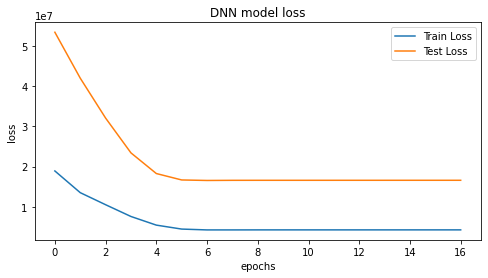

In [17]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [18]:
from sklearn import metrics

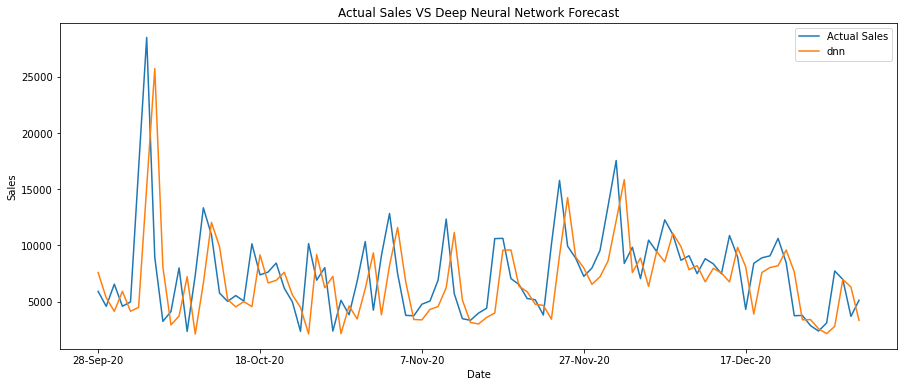

In [19]:
dnn['Actual Sales'].plot(figsize=(15,6))
dnn['dnn'].plot(figsize=(15,6))
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Deep Neural Network Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [20]:
y_true = dnn["Actual Sales"].dropna()
y_pred = dnn["dnn"].dropna()

In [21]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
print(timeseries_evaluation_metrics_func(y_true, y_pred))

Evaluation metric results:-
MSE is : 16574986.143163651
MAE is : 2858.8926898643094
RMSE is : 4071.238895368786
MAPE is : 39.99596988944394
R2 is : -0.10192119073021422

None
